1. Import the csv file into a Data Frame.
2. Identify the number of columns and check the size of the dataframe

In [1]:
import pandas as pd

df = pd.read_csv('loan.csv')

df.columns


/var/folders/06/t__b92xx3cv1zlsns9dz706h0000gn/T/ipykernel_80159/1350447619.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

Checking if the columns have any null values but seems like the results are not so intuitive to read

In [2]:
df.desc.isnull().sum()

12942

In [3]:
#df['total_bc_limit'].isnull().sum()
#Understand the shape of the DataFrame
df.shape
#df.dropna(axis=1,how='all').dropna(how='all')
#Drop the columns with all the null values
nullDroppedDf = df.dropna(axis=1,how='all').dropna(how='all')




Get the list of all existing columns after deleting the columns with null values

In [4]:
import numpy as np
cols = np.array(nullDroppedDf.columns)
cols.sort()
cols

array(['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type',
       'chargeoff_within_12_mths', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'desc',
       'dti', 'earliest_cr_line', 'emp_length', 'emp_title',
       'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id',
       'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate',
       'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d',
       'loan_amnt', 'loan_status', 'member_id', 'mths_since_last_delinq',
       'mths_since_last_record', 'next_pymnt_d', 'open_acc', 'out_prncp',
       'out_prncp_inv', 'policy_code', 'pub_rec', 'pub_rec_bankruptcies',
       'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util',
       'sub_grade', 'tax_liens', 'term', 'title', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'total_rec_late_fee', 'total_rec_prncp', 'url',
       'verification_status', 'zip

Get the list of all the columns which have unique values in all its rows

In [5]:
nullDroppedDf.shape
#(39717, 57)
uniquecols = [col for col in np.array(nullDroppedDf.columns) if nullDroppedDf[col].nunique() == 1]
len(uniquecols)

9

In [6]:
nullDroppedDf[uniquecols].head()

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0


Drop all the values with unique values because they will not provide any additional insights into the data

In [7]:
uniqueDroppedDf = nullDroppedDf.drop(nullDroppedDf.columns[nullDroppedDf.nunique() == 1].tolist(),axis=1)
#nullDroppedDf.to_excel('nullDropped.xlsx',index=False)

The shape of the dataframe after deleting the columns which are not relevant

In [8]:
uniqueDroppedDf.shape

(39717, 48)

Final list of columns on which the data analysis needs to be done

In [9]:
uniqueDroppedDf.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

Understanding some of the columns in the Dataframe

In [10]:
uniqueDroppedDf.delinq_2yrs.value_counts()

delinq_2yrs
0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

In [11]:
uniqueDroppedDf.columns
df.chargeoff_within_12_mths.nunique()

1

In [12]:
uniqueDroppedDf.collection_recovery_fee.value_counts()

collection_recovery_fee
0.0000      35935
2.0000         12
1.2000         10
3.7100          9
1.8800          8
            ...  
3.7900          1
773.4900        1
272.8250        1
1.7697          1
0.2300          1
Name: count, Length: 2616, dtype: int64

In [13]:
uniqueDroppedDf.recoveries.value_counts()

recoveries
0.00       35499
11.29          4
10.40          4
10.66          3
44.92          3
           ...  
764.69         1
653.08         1
1080.96        1
878.19         1
21.29          1
Name: count, Length: 4040, dtype: int64

In [14]:
new_column_names = {'acc_now_delinq':'num_of_curr_delq_acc',
'collection_recovery_fee':'collection_fee_post_chargeoff',
'collections_12_mths_ex_med':'num_of_coll_in_12_mnths_ex_med',
'delinq_2yrs':'num_of_30plus_del_amt_for_2yrs',
'delinq_amnt':'pastdue_owed_amt_on_delq_acct',
'desc':'loan_desc_by_borrower',
'dti':'debt_to_income_ratio',
'earliest_cr_line':'mnth_earliest_crdt_line_opened',
'emp_length':'emplyment_len_yrs',
'emp_title':'borrower_emplymnt_title',
'funded_amnt_inv':'total_committed_amnt_by_investors',
'grade':'assgnd_loan_grade',
'id':'loan_listing_id',
'initial_list_status':'initial_loan_listing_status',
'inq_last_6mths':'num_inq_past_6mnths',
'installment':'mnthly_installment',
'int_rate':'loan_interest_rate',
'issue_d':'loan_funded_mnth',
'last_credit_pull_d':'mnth_recent_credit_pulled',
'last_pymnt_amnt':'last_total_pymnt_amnt_receivd',
'last_pymnt_d':'last_mnth_was_pymnt_receivd',
'loan_amnt':'curr_apprvd_loan_amnt',
'term':'loan_term_mnths',
'next_pymnt_d':'next_payment_date',
'open_acc':'num_of_open_credit_accnts',
'out_prncp':'outstanding_prinpl_amnt',
'out_prncp_inv':'outstanding_prinpl_investors',
'pub_rec':'num_derogtry_publc_recs',
'pub_rec_bankruptcies':'num_publc_rec_bankruptcies',
'purpose':'loan_purpose',
'revol_util':'revolv_util_rate',
'tax_liens':'num_tax_liens',
'title':'loan_title',
'total_acc':'num_total_curr_acc_lines_',
'total_pymnt':'total_payments_received',
'total_pymnt_inv':'total_payments_received_inv',
'total_rec_int':'total_interest_received',
'total_rec_late_fee':'total_late_fee_received',
'total_rec_prncp':'total_principal_received',
'verification_status':'incm_src_verification_status'
}

In [15]:
uniqueDroppedDf = uniqueDroppedDf.rename(columns=new_column_names)

In [16]:
uniqueDroppedDf.columns

Index(['loan_listing_id', 'member_id', 'curr_apprvd_loan_amnt', 'funded_amnt',
       'total_committed_amnt_by_investors', 'loan_term_mnths',
       'loan_interest_rate', 'mnthly_installment', 'assgnd_loan_grade',
       'sub_grade', 'borrower_emplymnt_title', 'emplyment_len_yrs',
       'home_ownership', 'annual_inc', 'incm_src_verification_status',
       'loan_funded_mnth', 'loan_status', 'url', 'loan_desc_by_borrower',
       'loan_purpose', 'loan_title', 'zip_code', 'addr_state',
       'debt_to_income_ratio', 'num_of_30plus_del_amt_for_2yrs',
       'mnth_earliest_crdt_line_opened', 'num_inq_past_6mnths',
       'mths_since_last_delinq', 'mths_since_last_record',
       'num_of_open_credit_accnts', 'num_derogtry_publc_recs', 'revol_bal',
       'revolv_util_rate', 'num_total_curr_acc_lines_',
       'outstanding_prinpl_amnt', 'outstanding_prinpl_investors',
       'total_payments_received', 'total_payments_received_inv',
       'total_principal_received', 'total_interest_received

In [17]:
print(uniqueDroppedDf.dtypes)

loan_listing_id                        int64
member_id                              int64
curr_apprvd_loan_amnt                  int64
funded_amnt                            int64
total_committed_amnt_by_investors    float64
loan_term_mnths                       object
loan_interest_rate                    object
mnthly_installment                   float64
assgnd_loan_grade                     object
sub_grade                             object
borrower_emplymnt_title               object
emplyment_len_yrs                     object
home_ownership                        object
annual_inc                           float64
incm_src_verification_status          object
loan_funded_mnth                      object
loan_status                           object
url                                   object
loan_desc_by_borrower                 object
loan_purpose                          object
loan_title                            object
zip_code                              object
addr_state

In [18]:
uniqueDroppedDf.num_publc_rec_bankruptcies = pd.to_datetime(uniqueDroppedDf.num_publc_rec_bankruptcies)
uniqueDroppedDf.mnth_earliest_crdt_line_opened = pd.to_datetime(uniqueDroppedDf.mnth_earliest_crdt_line_opened,format='%b-%y')
uniqueDroppedDf.next_payment_date = pd.to_datetime(uniqueDroppedDf.next_payment_date,format='%b-%y')
uniqueDroppedDf.mnth_recent_credit_pulled = pd.to_datetime(uniqueDroppedDf.mnth_recent_credit_pulled,format='%b-%y')
uniqueDroppedDf.loan_funded_mnth = pd.to_datetime(uniqueDroppedDf.loan_funded_mnth,format='%b-%y')
uniqueDroppedDf.last_mnth_was_pymnt_receivd = pd.to_datetime(uniqueDroppedDf.last_mnth_was_pymnt_receivd,format='%b-%y')

In [19]:
uniqueDroppedDf.loan_funded_mnth.unique()

<DatetimeArray>
['2011-12-01 00:00:00', '2011-11-01 00:00:00', '2011-10-01 00:00:00',
 '2011-09-01 00:00:00', '2011-08-01 00:00:00', '2011-07-01 00:00:00',
 '2011-06-01 00:00:00', '2011-05-01 00:00:00', '2011-04-01 00:00:00',
 '2011-03-01 00:00:00', '2011-02-01 00:00:00', '2011-01-01 00:00:00',
 '2010-12-01 00:00:00', '2010-11-01 00:00:00', '2010-10-01 00:00:00',
 '2010-09-01 00:00:00', '2010-08-01 00:00:00', '2010-07-01 00:00:00',
 '2010-06-01 00:00:00', '2010-05-01 00:00:00', '2010-04-01 00:00:00',
 '2010-03-01 00:00:00', '2010-02-01 00:00:00', '2010-01-01 00:00:00',
 '2009-12-01 00:00:00', '2009-11-01 00:00:00', '2009-10-01 00:00:00',
 '2009-09-01 00:00:00', '2009-08-01 00:00:00', '2009-07-01 00:00:00',
 '2009-06-01 00:00:00', '2009-05-01 00:00:00', '2009-04-01 00:00:00',
 '2009-03-01 00:00:00', '2009-02-01 00:00:00', '2009-01-01 00:00:00',
 '2008-12-01 00:00:00', '2008-11-01 00:00:00', '2008-10-01 00:00:00',
 '2008-09-01 00:00:00', '2008-08-01 00:00:00', '2008-07-01 00:00:00',
 '20

In [20]:
uniqueDroppedDf.loan_term_mnths = uniqueDroppedDf.loan_term_mnths.str.replace(' months','')
uniqueDroppedDf.loan_interest_rate = uniqueDroppedDf.loan_interest_rate.str.replace('%','')
uniqueDroppedDf.revolv_util_rate = uniqueDroppedDf.revolv_util_rate.str.replace('%','')

In [21]:
uniqueDroppedDf.loan_term_mnths = uniqueDroppedDf.loan_term_mnths.astype(int)
uniqueDroppedDf.loan_interest_rate = uniqueDroppedDf.loan_interest_rate.astype(float)
uniqueDroppedDf.revolv_util_rate = uniqueDroppedDf.revolv_util_rate.astype(float)

In [22]:
uniqueDroppedDf.member_id.nunique()

39717

In [23]:
uniqueDroppedDf.set_index(keys=['loan_listing_id','member_id'],inplace=True)
uniqueDroppedDf

,,curr_apprvd_loan_amnt,funded_amnt,total_committed_amnt_by_investors,loan_term_mnths,loan_interest_rate,mnthly_installment,assgnd_loan_grade,sub_grade,borrower_emplymnt_title,emplyment_len_yrs,...,total_principal_received,total_interest_received,total_late_fee_received,recoveries,collection_fee_post_chargeoff,last_mnth_was_pymnt_receivd,last_total_pymnt_amnt_receivd,next_payment_date,mnth_recent_credit_pulled,num_publc_rec_bankruptcies
loan_listing_id,member_id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,...,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,1970-01-01
1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,...,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,1970-01-01
1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,...,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,1970-01-01
1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,1970-01-01
1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,...,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-06-01,2016-05-01,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,FiSite Research,4 years,...,2500.00,322.97,0.00,0.00,0.00,2010-07-01,80.90,NaT,2010-06-01,NaT
90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,8500.00,1413.49,0.00,0.00,0.00,2010-07-01,281.94,NaT,2010-07-01,NaT
90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,NaN,< 1 year,...,5000.00,272.16,0.00,0.00,0.00,2008-04-01,0.00,NaT,2007-06-01,NaT


<BarContainer object of 11 artists>

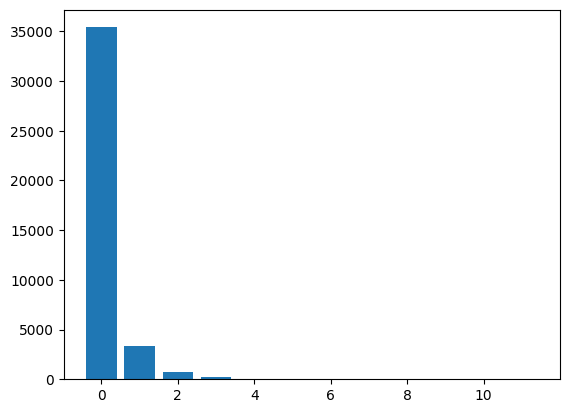

In [24]:
import matplotlib.pyplot as plt

counts = uniqueDroppedDf.num_of_30plus_del_amt_for_2yrs.value_counts()
plt.bar(counts.index,counts.values)




#uniqueDroppedDf.num_of_30plus_del_amt_for_2yrs

In [25]:
udf = uniqueDroppedDf

udf.isna().sum()

#uniqueDroppedDf.to_excel('loan_filtered.xlsx')

curr_apprvd_loan_amnt                    0
funded_amnt                              0
total_committed_amnt_by_investors        0
loan_term_mnths                          0
loan_interest_rate                       0
mnthly_installment                       0
assgnd_loan_grade                        0
sub_grade                                0
borrower_emplymnt_title               2459
emplyment_len_yrs                     1075
home_ownership                           0
annual_inc                               0
incm_src_verification_status             0
loan_funded_mnth                         0
loan_status                              0
url                                      0
loan_desc_by_borrower                12942
loan_purpose                             0
loan_title                              11
zip_code                                 0
addr_state                               0
debt_to_income_ratio                     0
num_of_30plus_del_amt_for_2yrs           0
mnth_earlie

In [26]:
udf.mths_since_last_delinq.value_counts()
udf.mths_since_last_delinq.fillna(0,inplace=True)

In [27]:
udf.mths_since_last_delinq.astype(int)

loan_listing_id  member_id
1077501          1296599       0
1077430          1314167       0
1077175          1313524       0
1076863          1277178      35
1075358          1311748      38
                              ..
92187            92174         0
90665            90607         5
90395            90390         0
90376            89243         0
87023            86999        11
Name: mths_since_last_delinq, Length: 39717, dtype: int64

In [28]:
import seaborn as sns

udf.curr_apprvd_loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: curr_apprvd_loan_amnt, dtype: float64

In [29]:
udf['debt_to_income_ratio'].corr(udf['num_of_30plus_del_amt_for_2yrs'])

-0.0344515578834911

In [30]:
udf['incm_src_verification_status'].value_counts()
chrgdOffLoandf = udf[udf.loan_status == 'Charged Off']

<BarContainer object of 3 artists>

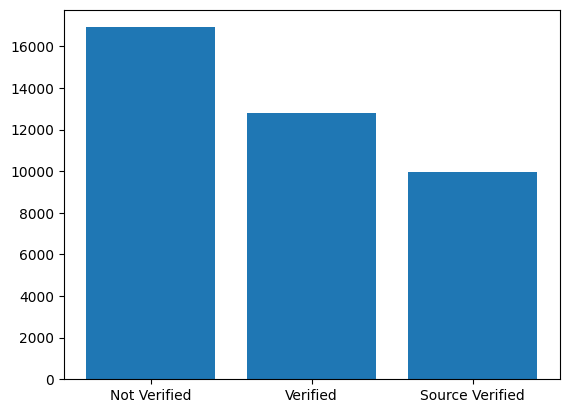

In [31]:
import matplotlib.pyplot as plt
#plt.bar(chrgdOffLoandf['incm_src_verification_status'].value_counts().index,chrgdOffLoandf['incm_src_verification_status'].value_counts().count)
counted = udf['incm_src_verification_status'].value_counts()
plt.bar(counted.index,counted.values)

In [32]:
udf.sub_grade.value_counts()

sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64

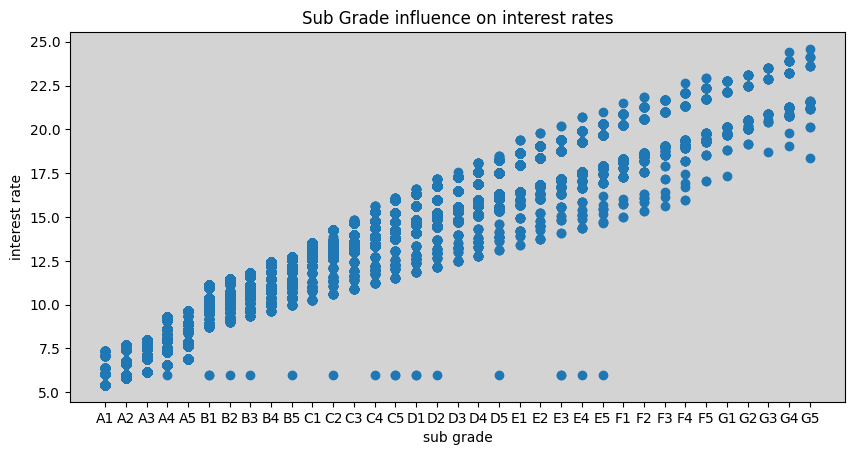

In [33]:

sorted_data = sorted(zip(udf['sub_grade'], udf['loan_interest_rate']))
sorted_x, sorted_y = zip(*sorted_data)

# Create the Figure and Axes objects
fig, ax = plt.subplots()
fig.set_figwidth(10)

# Create the scatter plot
ax.scatter(sorted_x, sorted_y)

# Customize the chart
ax.set_title('Sub Grade influence on interest rates')
ax.set_xlabel('sub grade')
ax.set_ylabel('interest rate')
ax.set_facecolor('lightgray')

# Show the chart
plt.show()


Fully Paid     32950
Charged Off     5627
Current         1140

In [34]:
udf.assgnd_loan_grade.value_counts()
def mapValues(x):
    if (x == 'Charged Off'):
        return -1
    if (x == 'Fully Paid'):
        return 1
    if (x == 'Current'):
        return 0
udf['loan_status_value'] = udf['loan_status'].apply(mapValues)
pd.pivot_table(udf,values='loan_status_value',index='assgnd_loan_grade',columns='loan_status',aggfunc='count')

loan_status,Charged Off,Current,Fully Paid
assgnd_loan_grade,,,
A,602,40,9443
B,1425,345,10250
C,1347,264,6487
D,1118,222,3967
E,715,179,1948
F,319,73,657
G,101,17,198


In [35]:
udf.loan_status_value.value_counts()

loan_status_value
 1    32950
-1     5627
 0     1140
Name: count, dtype: int64

In [36]:

pd.pivot_table(udf,values='loan_status_value',index='num_of_30plus_del_amt_for_2yrs',columns='loan_status',aggfunc='count')



loan_status,Charged Off,Current,Fully Paid
num_of_30plus_del_amt_for_2yrs,,,
0,4936.0,1019.0,29450.0
1,507.0,96.0,2700.0
2,130.0,14.0,543.0
3,35.0,8.0,177.0
4,13.0,2.0,47.0
5,3.0,1.0,18.0
6,1.0,NaN,9.0
7,1.0,NaN,3.0
8,1.0,NaN,1.0


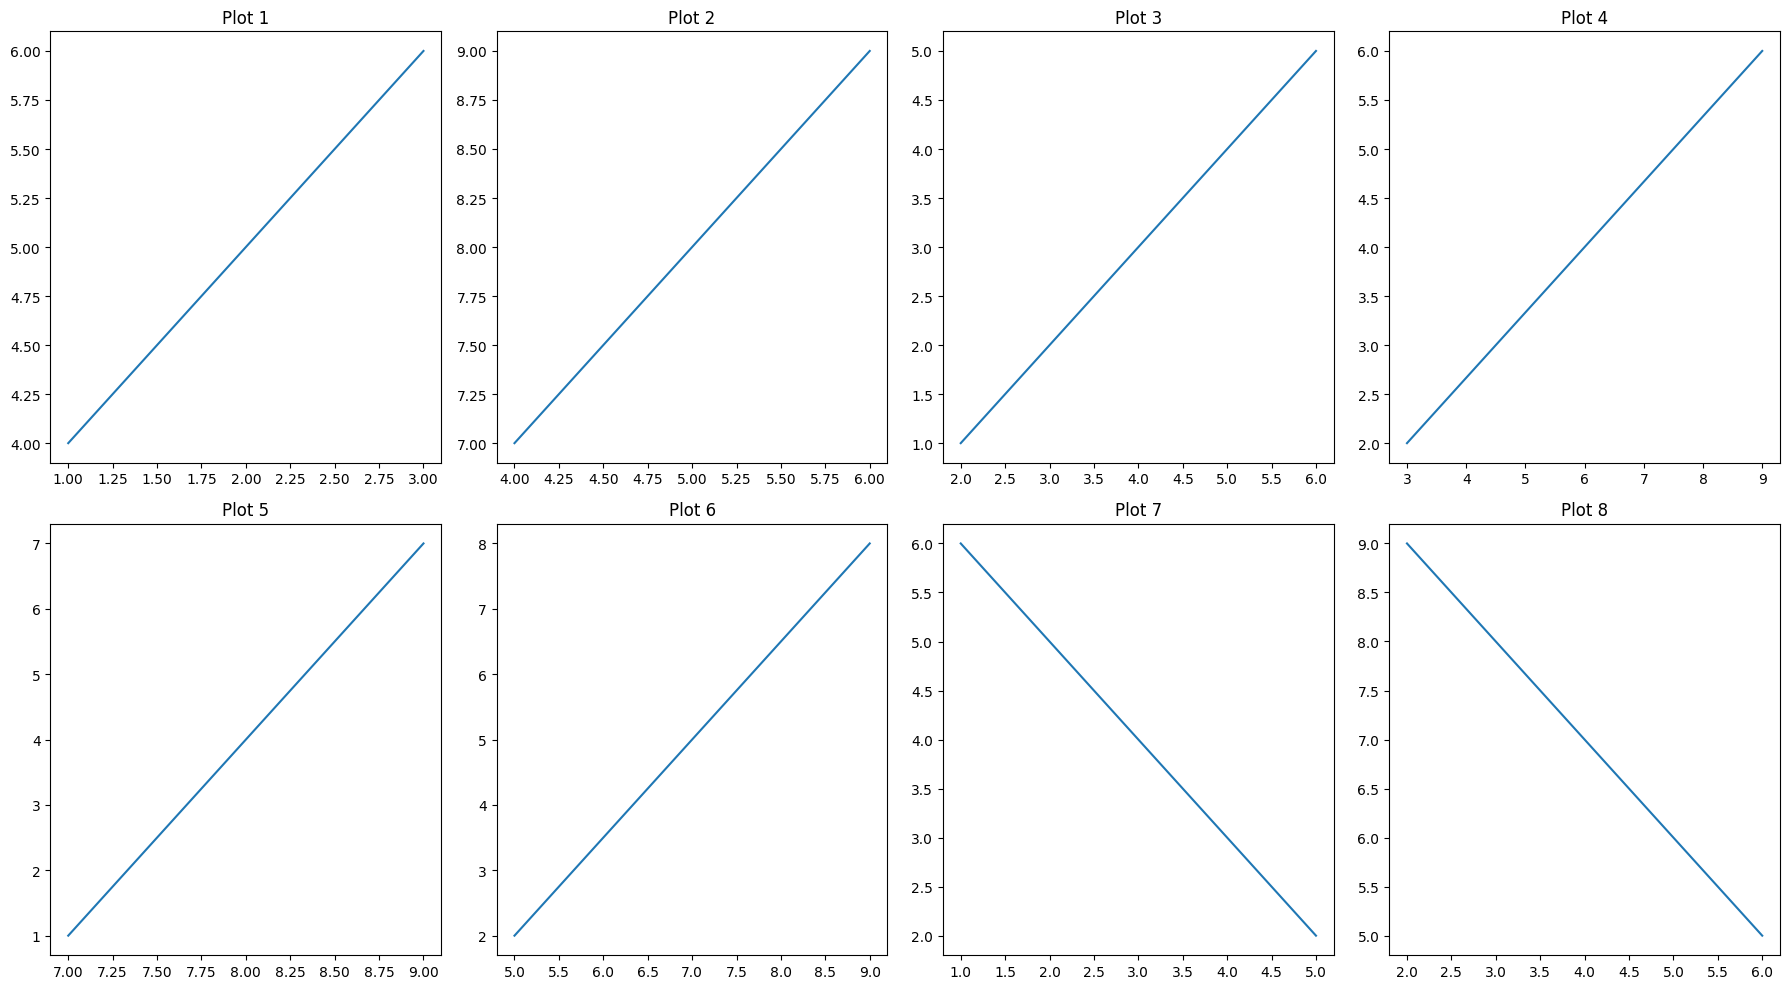

In [37]:

# Create the Figure and Axes objects
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Access each subplot and plot your data,
axes[0, 0].plot([1, 2, 3], [4, 5, 6])
axes[0, 0].set_title('Plot 1')

axes[0, 1].plot([4, 5, 6], [7, 8, 9])
axes[0, 1].set_title('Plot 2')

axes[0, 2].plot([2, 4, 6], [1, 3, 5])
axes[0, 2].set_title('Plot 3')

axes[0, 3].plot([3, 6, 9], [2, 4, 6])
axes[0, 3].set_title('Plot 4')

axes[1, 0].plot([7, 8, 9], [1, 4, 7])
axes[1, 0].set_title('Plot 5')

axes[1, 1].plot([5, 7, 9], [2, 5, 8])
axes[1, 1].set_title('Plot 6')

axes[1, 2].plot([1, 3, 5], [6, 4, 2])
axes[1, 2].set_title('Plot 7')

axes[1, 3].plot([2, 4, 6], [9, 7, 5])
axes[1, 3].set_title('Plot 8')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the Figure with all the subplots
plt.show()


In [38]:
udf['loan_status']

loan_listing_id  member_id
1077501          1296599       Fully Paid
1077430          1314167      Charged Off
1077175          1313524       Fully Paid
1076863          1277178       Fully Paid
1075358          1311748          Current
                                 ...     
92187            92174         Fully Paid
90665            90607         Fully Paid
90395            90390         Fully Paid
90376            89243         Fully Paid
87023            86999         Fully Paid
Name: loan_status, Length: 39717, dtype: object

In [39]:
# Changing the loan status values
# Removing Currently active loans and focusing on Fully Paid and Chargedoff Loan accounts.
# Converting values from 'Fully Paid' to 0 and from 'Charged Off' to 1
udf = udf[udf['loan_status']!='Current']
udf['loan_status'] = udf['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

/var/folders/06/t__b92xx3cv1zlsns9dz706h0000gn/T/ipykernel_80159/84280910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udf['loan_status'] = udf['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)


In [40]:
z = np.array(udf.columns)

In [41]:
len(z)

47

In [42]:
z.sort()

In [43]:
for x in z:
    print(x)

addr_state
annual_inc
assgnd_loan_grade
borrower_emplymnt_title
collection_fee_post_chargeoff
curr_apprvd_loan_amnt
debt_to_income_ratio
emplyment_len_yrs
funded_amnt
home_ownership
incm_src_verification_status
last_mnth_was_pymnt_receivd
last_total_pymnt_amnt_receivd
loan_desc_by_borrower
loan_funded_mnth
loan_interest_rate
loan_purpose
loan_status
loan_status_value
loan_term_mnths
loan_title
mnth_earliest_crdt_line_opened
mnth_recent_credit_pulled
mnthly_installment
mths_since_last_delinq
mths_since_last_record
next_payment_date
num_derogtry_publc_recs
num_inq_past_6mnths
num_of_30plus_del_amt_for_2yrs
num_of_open_credit_accnts
num_publc_rec_bankruptcies
num_total_curr_acc_lines_
outstanding_prinpl_amnt
outstanding_prinpl_investors
recoveries
revol_bal
revolv_util_rate
sub_grade
total_committed_amnt_by_investors
total_interest_received
total_late_fee_received
total_payments_received
total_payments_received_inv
total_principal_received
url
zip_code


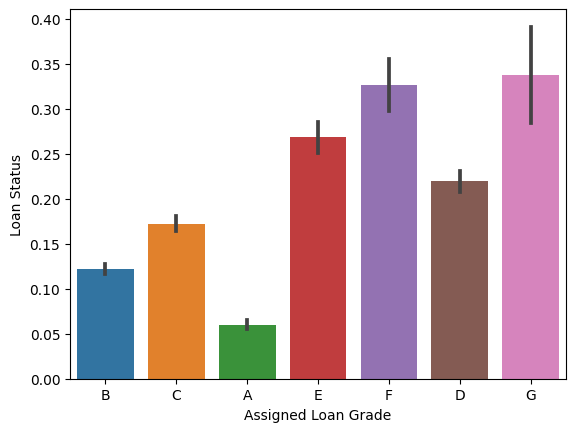

In [136]:
sns.barplot(y='loan_status',x='assgnd_loan_grade',data=udf)
plt.xlabel('Assigned Loan Grade')
plt.ylabel('Loan Status')
plt.show()

## Analysis of the above graph:
- Lower the assigned grade, higher the tendency of the account defaulting and getting chargedoff.

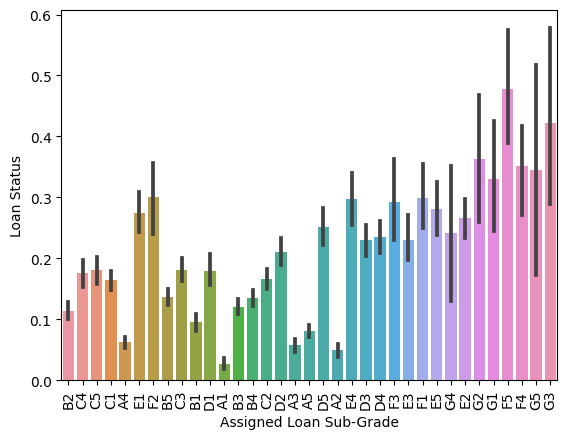

In [137]:
sns.barplot(x='sub_grade',y='loan_status',data=udf)
plt.xticks(rotation=90)
plt.xlabel('Assigned Loan Sub-Grade')
plt.ylabel('Loan Status')
plt.show()
plt.show()

## Analysis of the above graph:
- Lower the assigned sub-grade, higher the tendency of the account defaulting and getting chargedoff.

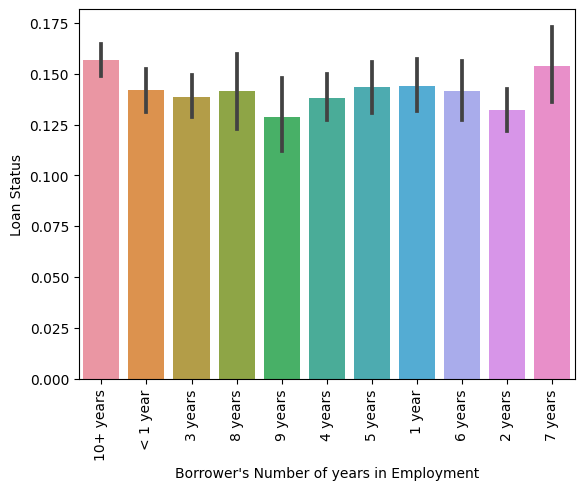

In [139]:
sns.barplot(x='emplyment_len_yrs',y='loan_status',data=udf)
plt.xticks(rotation=90)
plt.xlabel('Borrower\'s Number of years in Employment')
plt.ylabel('Loan Status')
plt.show()
plt.show()

## Analysis of the above graph:
- The total number of years that the borrower is employed seems to have no significant  effect on the loan account being chargedoff.

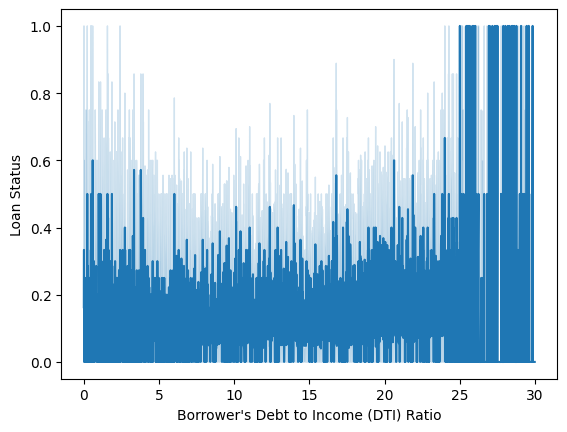

In [174]:
sns.lineplot(y='loan_status',x='debt_to_income_ratio',data=udf)
plt.xlabel('Borrower\'s Debt to Income (DTI) Ratio')
plt.ylabel('Loan Status')
plt.show()

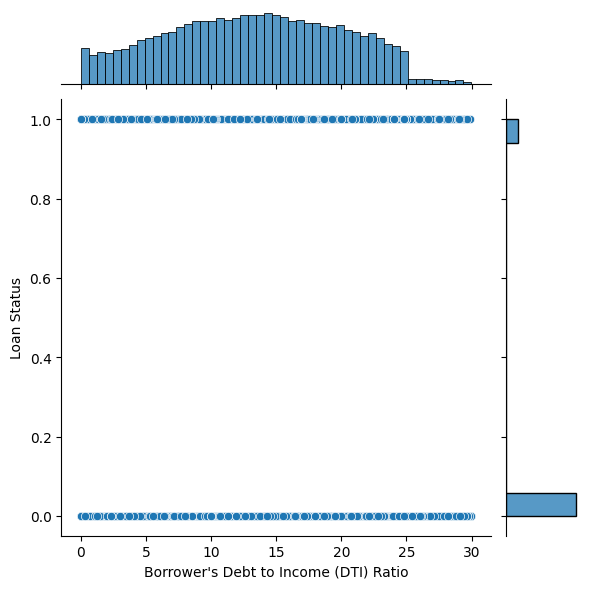

In [175]:
sns.jointplot(data=udf,y = 'loan_status',x='debt_to_income_ratio')
plt.xlabel('Borrower\'s Debt to Income (DTI) Ratio')
plt.ylabel('Loan Status')
plt.show()

## Analysis of the above 2 graphs:
- In the above jointplot, you can see the mean debt-to-income ratio of the LC's borrowers is approximately 15.
- The count of accounts that are Fully Paid is also considerably higher than the number of Chargedoff Accounts.
<br>
<br>
- The above linegraph shows that greater the debt-to-income ratio, greater the tendency of the account defaulting and being marked as chargedoff.
- The spike in number of accounts getting chargedoff can be see for the debt-to-income ratio values > 25.

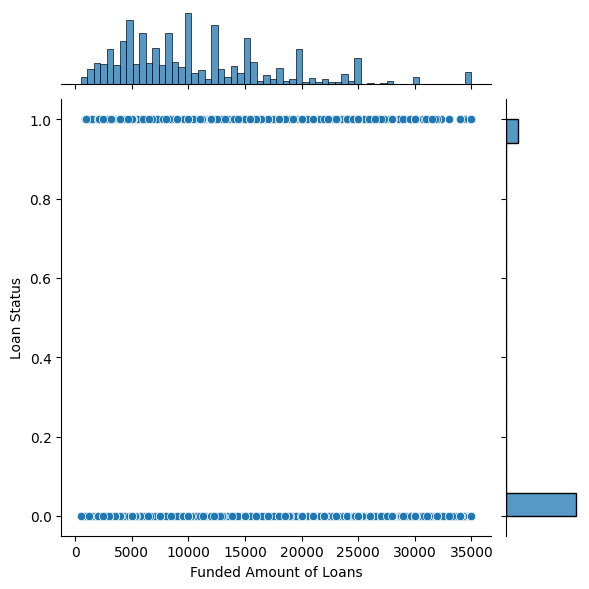

In [135]:
sns.jointplot(x='funded_amnt',y='loan_status',data=udf)
plt.xlabel('Funded Amount of Loans')
plt.ylabel('Loan Status')
plt.show()

## Analysis of the above graph:
- From the above jointplot, you can see that the number of accounts marked as Fully Paid are more in count, and the funded amount of loans lies well below 15,000.
- This could go mean that the since the majority of loans have a amount less than 15,000, it is harder for them to default.

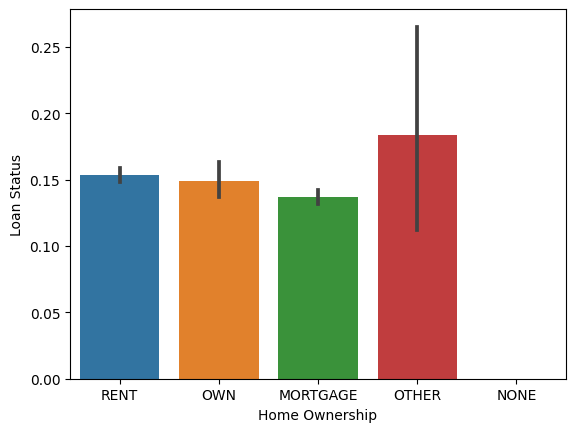

In [142]:
sns.barplot(x='home_ownership',y='loan_status',data=udf)
plt.xlabel('Home Ownership')
plt.ylabel('Loan Status')
plt.show()

## Analysis of the above graph:
- From the above graph, you can see that there is no significant difference between the loan status values for each of the home ownership values.
- This could go to show that there may not be any correlation between the two.

<function matplotlib.pyplot.show(close=None, block=None)>

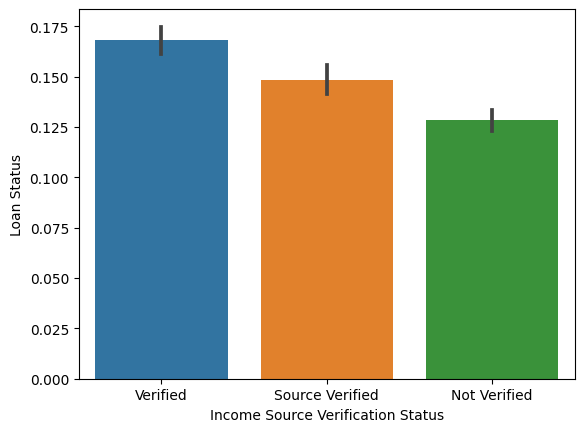

In [133]:
sns.barplot(x='incm_src_verification_status',y='loan_status',data=udf)
plt.xlabel('Income Source Verification Status')
plt.ylabel('Loan Status')
plt.show

## Analysis of the above graph:
- From the above graph, you can see that there is no great difference between the loan status values for each of the income source verifcation statuses.
- This could go to show that there may not be any correlation between the two.

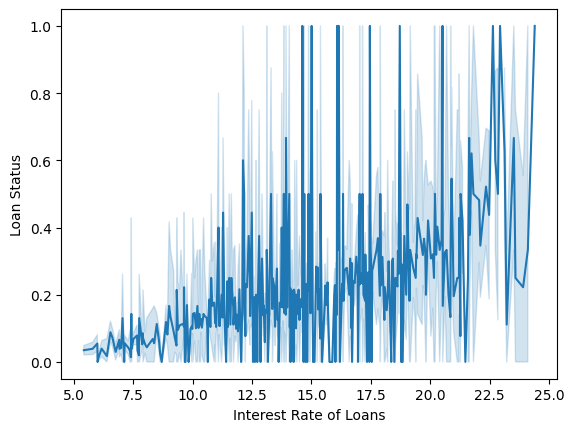

In [143]:
sns.lineplot(x='loan_interest_rate',y='loan_status',data=udf)
plt.xlabel('Interest Rate of Loans')
plt.ylabel('Loan Status')
plt.show()

## Analysis of the above graph:
- As you can see, there is an increase in the loan interest rate as the loan status tends to being chargedoff.

<Axes: xlabel='loan_status', ylabel='total_late_fee_received'>

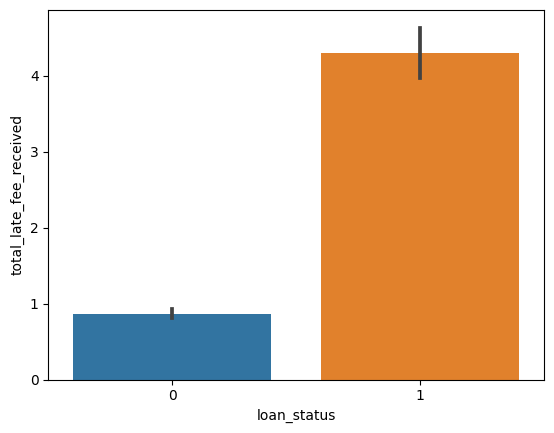

In [171]:
sns.barplot(x='loan_status',y='total_late_fee_received',data=udf)

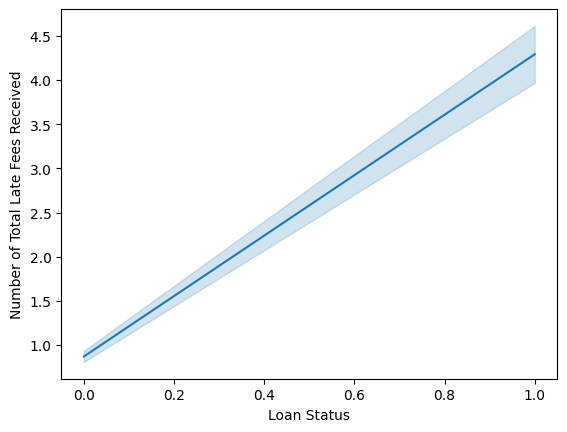

In [155]:
sns.lineplot(y='total_late_fee_received',x='loan_status',data=udf)
plt.ylabel('Number of Total Late Fees Received')
plt.xlabel('Loan Status')
plt.show()
plt.show()

## Analysis of the above 2 graphs:
- You can see the number of total late fees received for chargedoff accounts.
- Chargedoff accounts pay around 4+ late fees till the time they clear off their debts.


# Function for Updating Date columns:
- First, fill in the null values for that column.
- For filling null values, compare the median and/or mode and decide likewise.
- Break up the date column and create 2 new columns for 'month' and 'year'
<br>
<br>
- This is useful for getting the monthwise analysis and the yearwise analysis.


In [109]:
udf['last_mnth_was_pymnt_receivd']

loan_listing_id  member_id
1077501          1296599     2015-01-01
1077430          1314167     2013-04-01
1077175          1313524     2014-06-01
1076863          1277178     2015-01-01
1075269          1311441     2015-01-01
                                ...    
92187            92174       2010-07-01
90665            90607       2010-07-01
90395            90390       2008-04-01
90376            89243       2008-01-01
87023            86999       2010-06-01
Name: last_mnth_was_pymnt_receivd, Length: 38577, dtype: datetime64[ns]

In [ ]:
udf['last_mnth_was_pymnt_receivd']= udf['last_mnth_was_pymnt_receivd'].fillna(udf['last_mnth_was_pymnt_receivd'].median())

In [ ]:
udf['last_mnth_was_pymnt_receivd_month'] = pd.DatetimeIndex(udf['last_mnth_was_pymnt_receivd']).month
udf['last_mnth_was_pymnt_receivd_year'] = pd.DatetimeIndex(udf['last_mnth_was_pymnt_receivd']).year

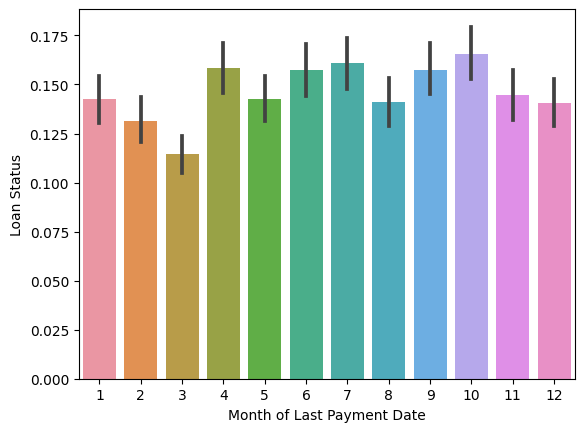

In [147]:
sns.barplot(x='last_mnth_was_pymnt_receivd_month',y='loan_status',data=udf)
plt.xlabel('Month of Last Payment Date')
plt.ylabel('Loan Status')
plt.show()

## Analysis of the above graph:
- In the monthwise graph, there is not much variation in the loan_status values (approx 0.12 to 0.17) for the chargedoff accounts.
- This goes to show that there is no specific month as to when we see most accounts getting chargedoff.

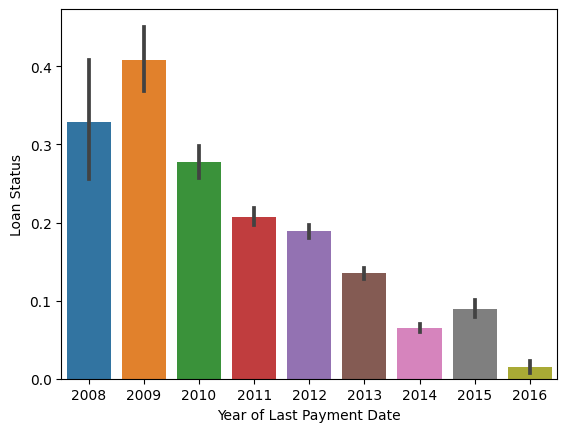

In [148]:
sns.barplot(x='last_mnth_was_pymnt_receivd_year',y='loan_status',data=udf)
plt.xlabel('Year of Last Payment Date')
plt.ylabel('Loan Status')
plt.show()

## Analysis of the above graph:
- As you can see in the yearwise graph, there is a steady decrease in accounts being marked as chargedoff.
- This goes to say that over the years, there is a decreasing in borrowers going delinquent